In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir('../')


In [72]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import ParameterSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt


In [48]:
learners = [
    {
        "learner": XGBClassifier,
        "params": {
            "learning_rate": [0.1],
            "colsample_bytree": [0.15, 0.25, 0.5, 0.75, 1],
            "colsample_bylevel": [1],
            "max_depth": [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25],
            "gamma": [0, 0.01, 0.05, 0.1, 0.25, 0.5],
            "subsample": [0.5, 0.75, 1],
            "min_child_weight": [1, 5, 10, 15, 25, 50, 100],
            "base_score": [0.52],
            "n_estimators": [50, 100, 200, 300, 500, 1000] 
            }
    },
    {
        "learner": RandomForestClassifier,
        "params": {
            "max_depth": [3, 4, 5, 10, 25, None],
            "max_features": ["auto", 0.1, 0.25, 0.5, 0.75, 1],
            "min_weight_fraction_leaf": [0, 0.01, 0.001],
            "bootstrap": [True, False],
            "n_jobs": [-1],
            "n_estimators": [50, 100, 200, 300, 500, 1000]             
            }
    },
    {
        "learner": ExtraTreesClassifier,
        "params": {
            "max_depth": [None],
            "max_features": ["auto", 0.1],
            "min_weight_fraction_leaf": [0, 0.01, 0.001],
            "bootstrap": [True, False],
            "n_jobs": [-1],
            "n_estimators": [50, 100, 200, 300, 500, 1000]             
            }
    },
    {
        "learner": LogisticRegression,
        "params": {
            "penalty": ["l2"],
            "C": [0.001, 0.01, 0.1, 1, 10, 100, 100],
            }
    },
]


In [39]:
train = pd.read_csv("./data/titanic/02 - preprocesada/train.csv")

In [42]:
X = train.drop(columns = ["Survived", "PassengerId"])
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
results = dict()
for x in range(0,10):
    candidate = np.random.choice(learners)
    learnerName = candidate["learner"].__name__
    params = list(ParameterSampler(candidate["params"], 1))[0]
    if learnerName not in paramsUsed:
        paramsUsed[learnerName] = []
    if params in paramsUsed[learnerName]:
        continue
    paramsUsed[learnerName].append(params)
    learner = candidate["learner"](**params)
    learner.fit(X_train, y_train)
    print("{}_{}".format(learnerName, str(x)))
    results["{}_{}".format(learnerName, str(x))] = {"params": params, 
                                                    "results": learner.predict_proba(X_test)[:,1],
                                                    "target": y_test.values}
    

    

XGBClassifier_0
XGBClassifier_1
RandomForestClassifier_2
ExtraTreesClassifier_3
RandomForestClassifier_4
ExtraTreesClassifier_5
RandomForestClassifier_8


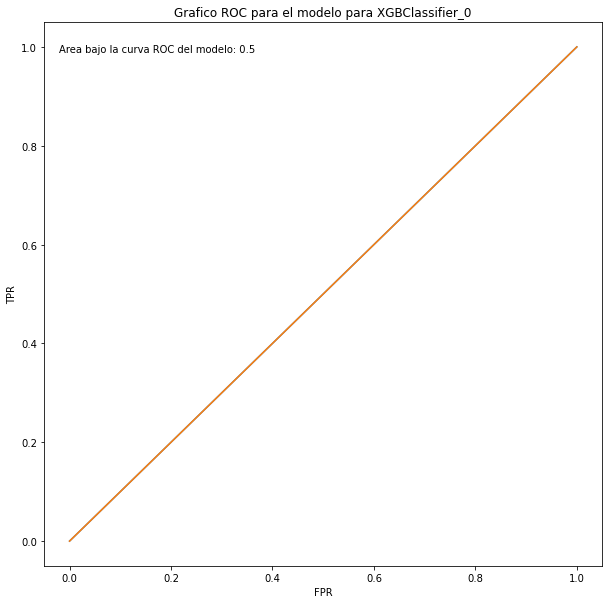

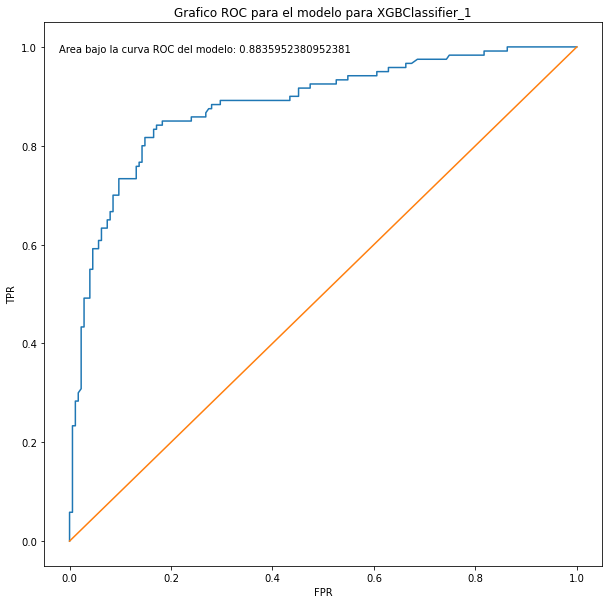

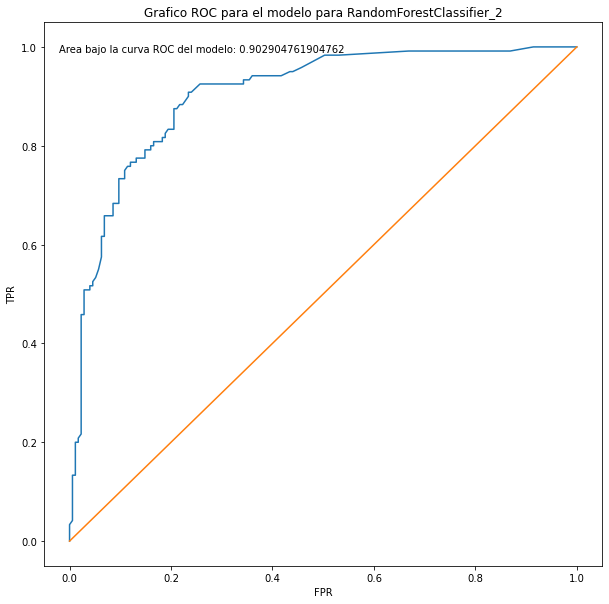

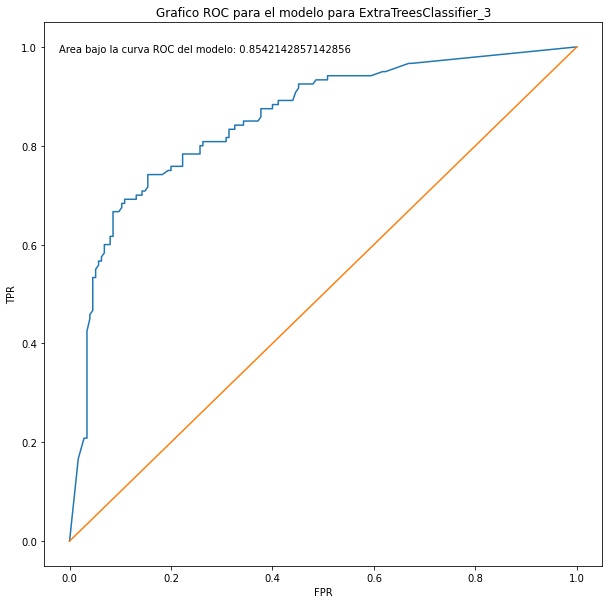

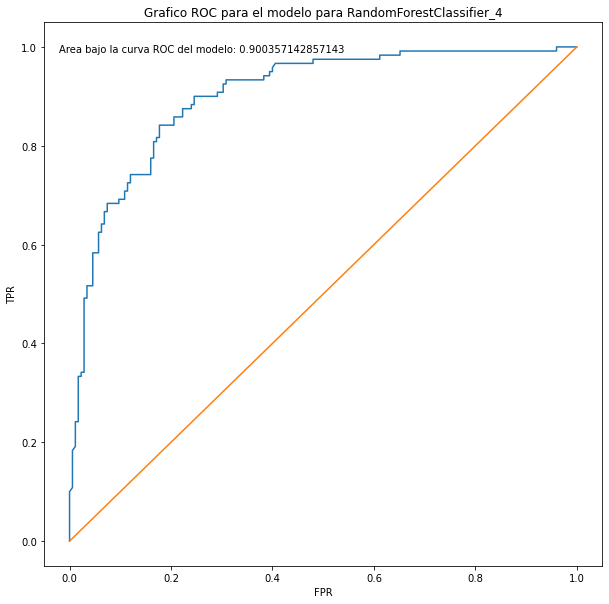

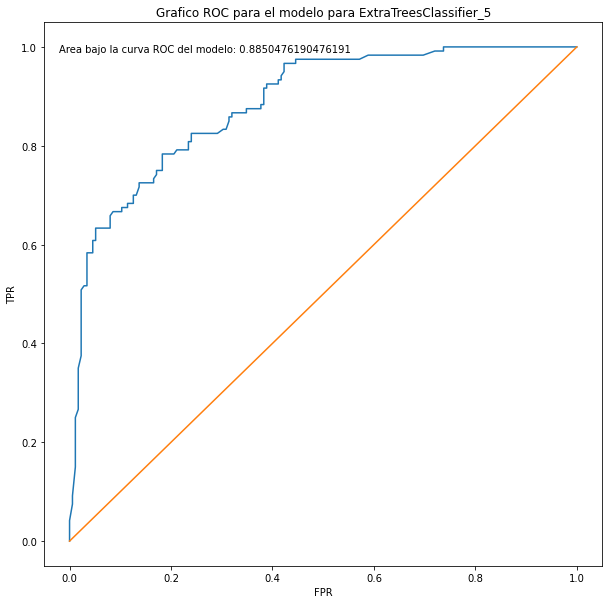

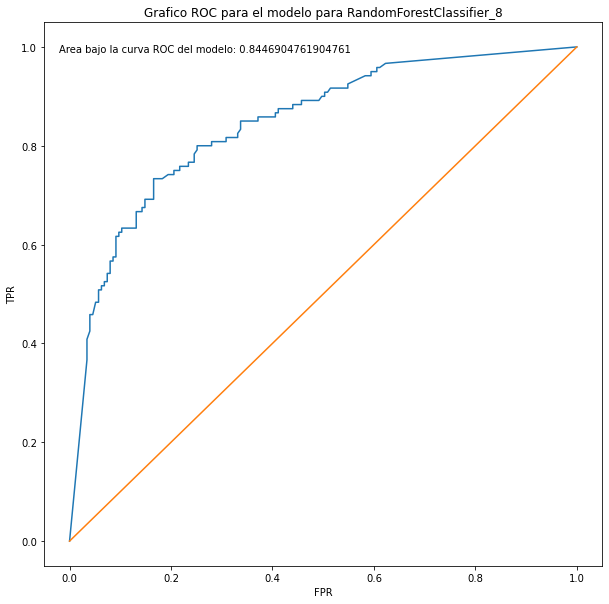

In [76]:
for y in results:
    result = results[y]
    areaBajoCurvaRoc = roc_auc_score(result["target"], result["results"])
    fpr, tpr, _ = roc_curve(result["target"], result["results"])
    plt.figure(figsize=(10,10))
    plt.title("Grafico ROC para el modelo para {}".format(y))
    plt.plot(fpr, tpr)
    plt.plot([0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
    plt.show()